In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm.auto import tqdm

In [3]:
%matplotlib inline

In [4]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "train.csv"
train_data = pd.read_csv(folder_path + file_path)
train_data.head() 

id                                              title  \
0   2009.0642  Completely Self-Supervised Crowd Counting via ...   
1  2010.13821  Wavelet Flow: Fast Training of High Resolution...   
2  1904.12782  Transversally Elliptic Complex and Cohomologic...   
3  2105.00878  On the Malliavin-Rubel theorem on small entire...   
4  1906.04024          On the Odd Cycle Game and Connected Rules   

                                            abstract category  
0    Dense crowd counting is a challenging task t...       cs  
1    Normalizing flows are a class of probabilist...       cs  
2    This work is a continuation of our previous ...     math  
3    In the early 1960s, P. Malliavin and L. A. R...     math  
4    We study the positional game where two playe...     math

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861236 entries, 0 to 861235
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        861236 non-null  object
 1   title     861236 non-null  object
 2   abstract  861236 non-null  object
 3   category  861232 non-null  object
dtypes: object(4)
memory usage: 26.3+ MB


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def createCorpus(textSeries):
  corpus = ""
  for sentence in tqdm(textSeries):
    corpus = corpus + sentence + " "
  return corpus

In [ ]:
corpus = createCorpus(train_data["title"])

  0%|          | 0/861236 [00:00<?, ?it/s]

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_word_collection=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 200,
                min_font_size = 10).generate(corpus)

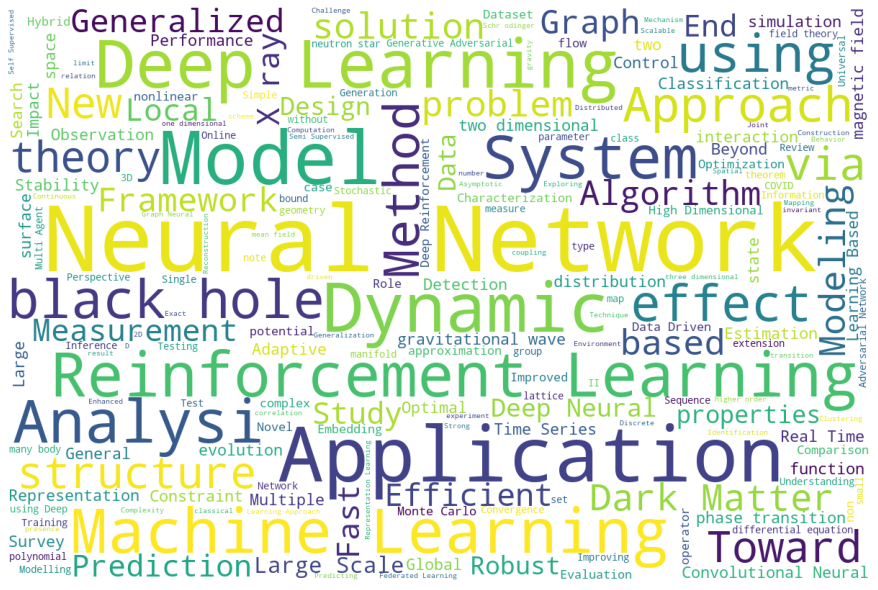

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig('my_plot.png')

In [ ]:
c = [corpus]

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib

In [ ]:
joblib.dump(c, folder_path + 'corpus.pkl') 

['/content/drive/MyDrive/Colab Notebooks/DataVerse/corpus.pkl']

In [ ]:
lis = joblib.load(folder_path + 'corpus.pkl')

In [ ]:
lis

In [ ]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(lis[0])

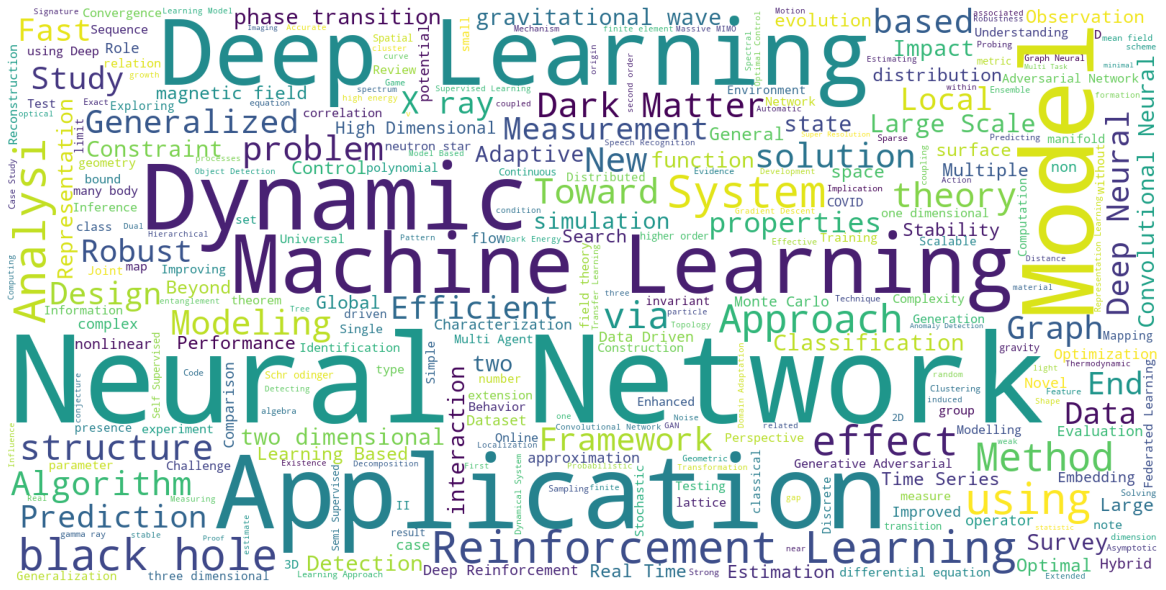

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

# Word Cloud on the basis of topics

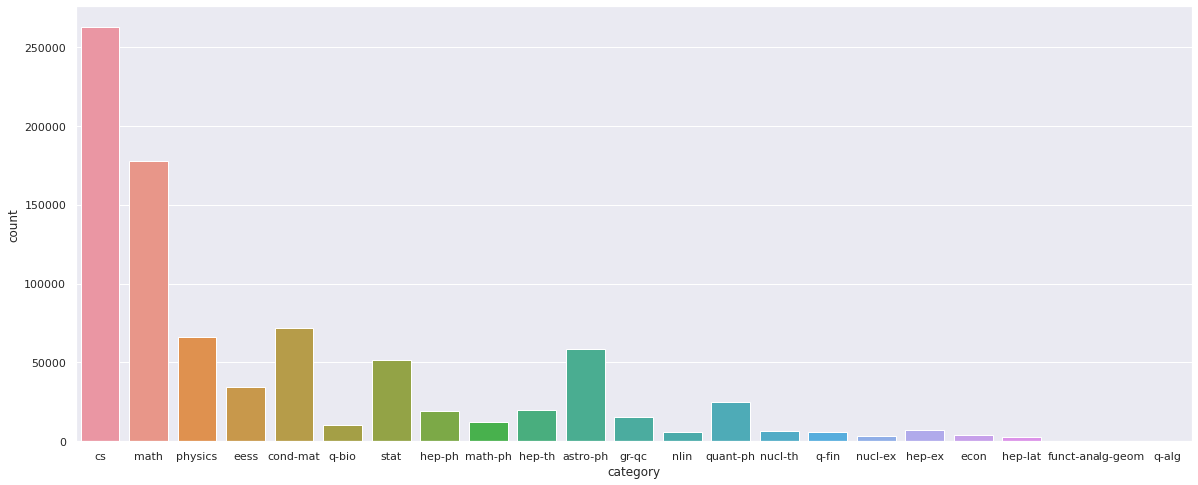

In [6]:
sns.set(rc={"figure.figsize":(20, 8)})
sns.countplot(x="category", data = train_data)

In [9]:
type(train_data.category.value_counts())

pandas.core.series.Series

In [10]:
category_value_counts = train_data.category.value_counts()

In [11]:
category_value_counts

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
q-alg            2
funct-an         1
alg-geom         1
Name: category, dtype: int64

In [17]:
category_list = list(category_value_counts.index)

In [18]:
minority_class = []
for i, x in enumerate(category_value_counts):
  if x < 15_000:
    minority_class.append(category_list[i])

In [19]:
minority_class

['math-ph',
 'q-bio',
 'hep-ex',
 'nucl-th',
 'nlin',
 'q-fin',
 'econ',
 'nucl-ex',
 'hep-lat',
 'q-alg',
 'funct-an',
 'alg-geom']

In [20]:
def createCorpus(textSeries, columns = minority_class):
  corpus = ""
  for sentence in tqdm(textSeries):
    corpus = corpus + sentence + " "
  return corpus

In [27]:
minority_dataframe = train_data[train_data["category"].isin(minority_class)]

In [28]:
minority_dataframe

id                                              title  \
18      2005.00921  An Epidemic Model SIPHERD and its application ...   
22      2012.03303  A Tridomain Model for Potassium Clearance in O...   
27      1912.00635  Hook variables: cut-and-join operators and $\t...   
66      2002.08851  Adaptive Finite Time Stability of Delayed Syst...   
91      1902.06333  Formation of native shortcut networks and two-...   
...            ...                                                ...   
861213   2004.1183  A rigorous derivation and energetics of a wave...   
861220  2102.05554  Dynamic Structural Impact of the COVID-19 Outb...   
861222  1909.02882  Implications of an increased $\Lambda$-separat...   
861224  2010.00965  Spreading height and critical conditions for t...   
861226  1902.05287  Risk management with machine-learning-based al...   

                                                 abstract category  
18        We propose an epidemic model SIPHERD in whic...    q-bio  
22        The accumulation of potassium in the narrow ...    q-bio  
27        Young diagrams can be parameterized with the...  math-ph  
66        In this brief, we set up the finite time sta...     nlin  
91        The Network Dynamics (ND) model is proposed....    q-bio  
...                                                   ...      ...  
861213    We consider a linear system that consists of...  math-ph  
861220    COVID-19 has impacted the economy of almost ...    q-fin  
861222    Stimulated by recent indications that the bi...  nucl-th  
861224    Axisymmetric fountains in stratified environ...     nlin  
861226    We propose some machine-learning-based algor...    q-fin  

[58947 rows x 4 columns]

In [29]:
corpus = createCorpus(minority_dataframe["title"])

  0%|          | 0/58947 [00:00<?, ?it/s]

In [32]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

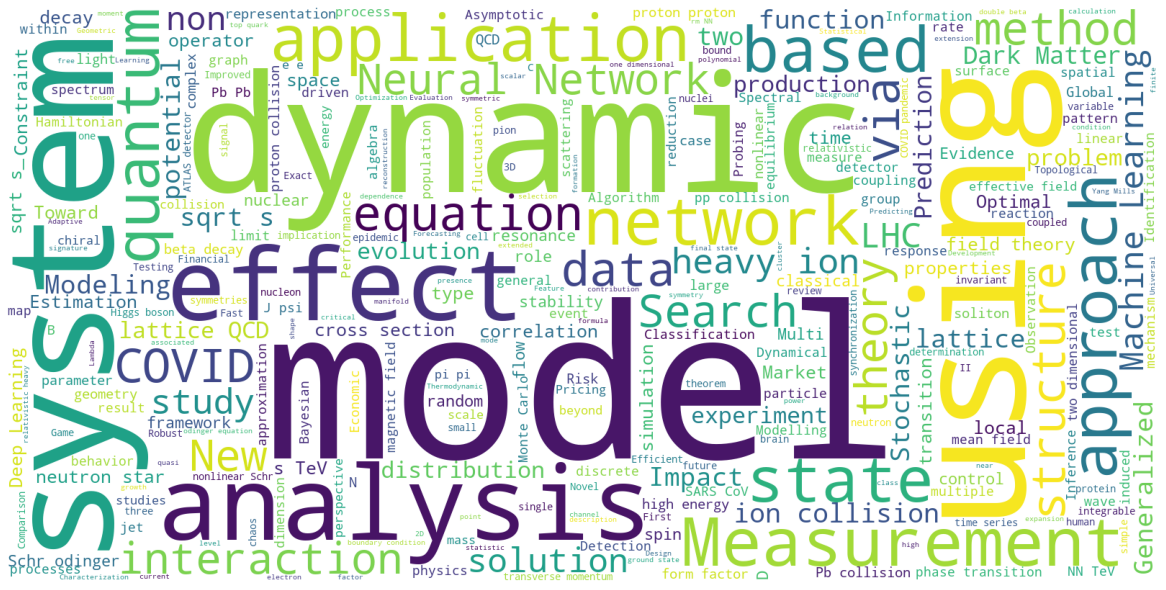

In [33]:
# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

# Word cloud based on subjects

In [34]:
def createCorpus(textSeries):
  corpus = ""
  for sentence in tqdm(textSeries):
    corpus = corpus + sentence + " "
  return corpus

  0%|          | 0/262503 [00:00<?, ?it/s]

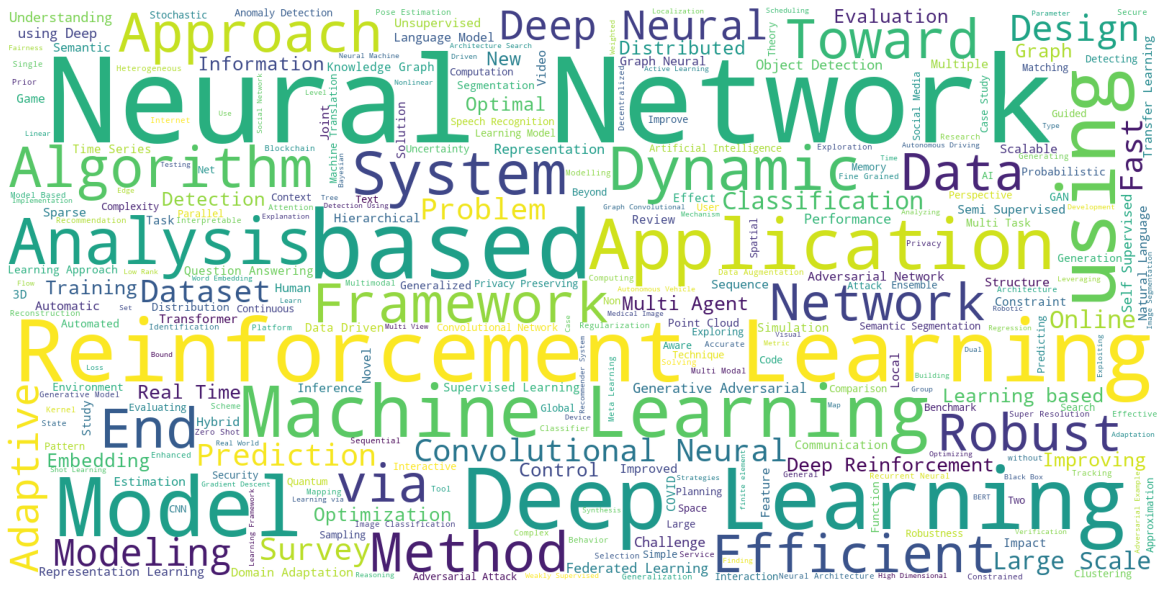

In [35]:
topic_df = train_data[train_data["category"] == "cs"]
corpus = createCorpus(topic_df["title"])

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

  0%|          | 0/177679 [00:00<?, ?it/s]

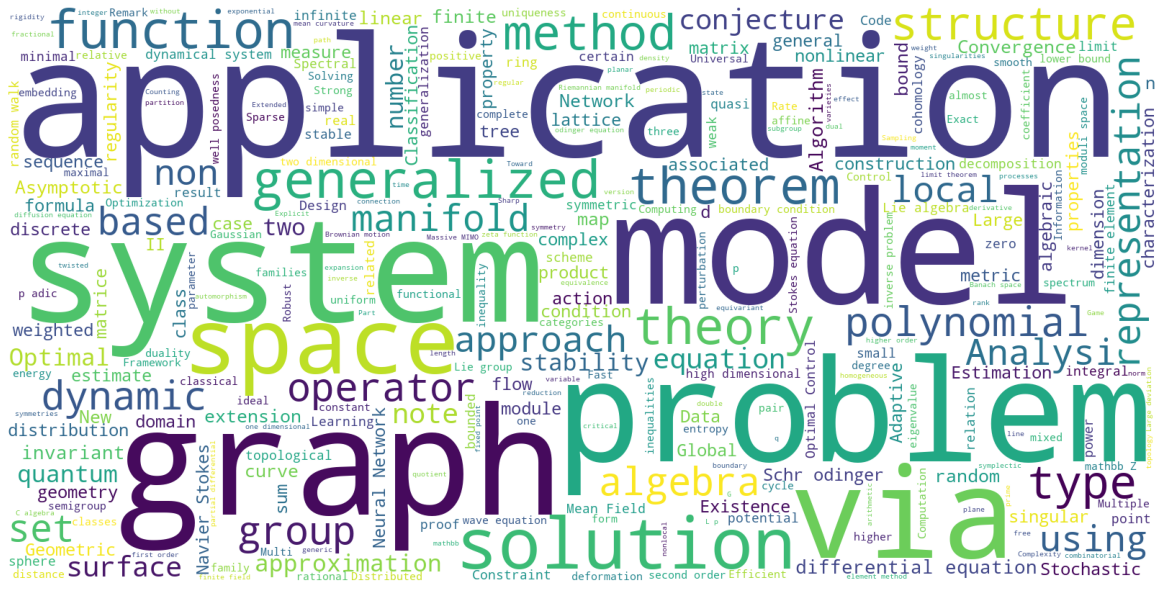

In [36]:
topic_df = train_data[train_data["category"] == "math"]
corpus = createCorpus(topic_df["title"])

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

  0%|          | 0/66282 [00:00<?, ?it/s]

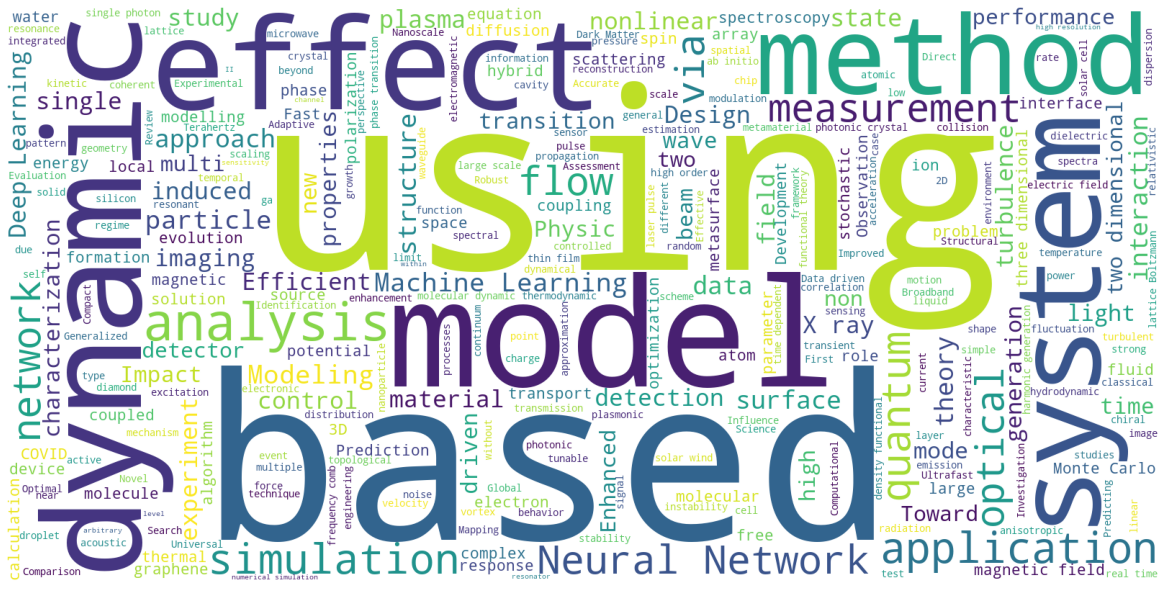

In [38]:
topic_df = train_data[train_data["category"] == "physics"]
corpus = createCorpus(topic_df["title"])

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

  0%|          | 0/51308 [00:00<?, ?it/s]

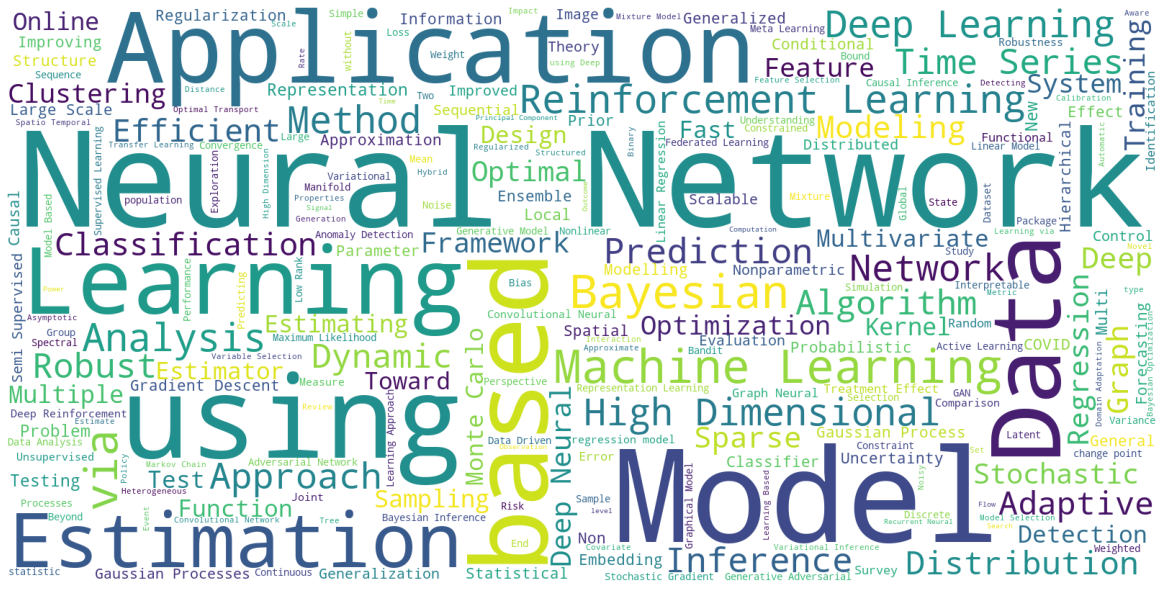

In [39]:
topic_df = train_data[train_data["category"] == "stat"]
corpus = createCorpus(topic_df["title"])

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()

  0%|          | 0/58737 [00:00<?, ?it/s]

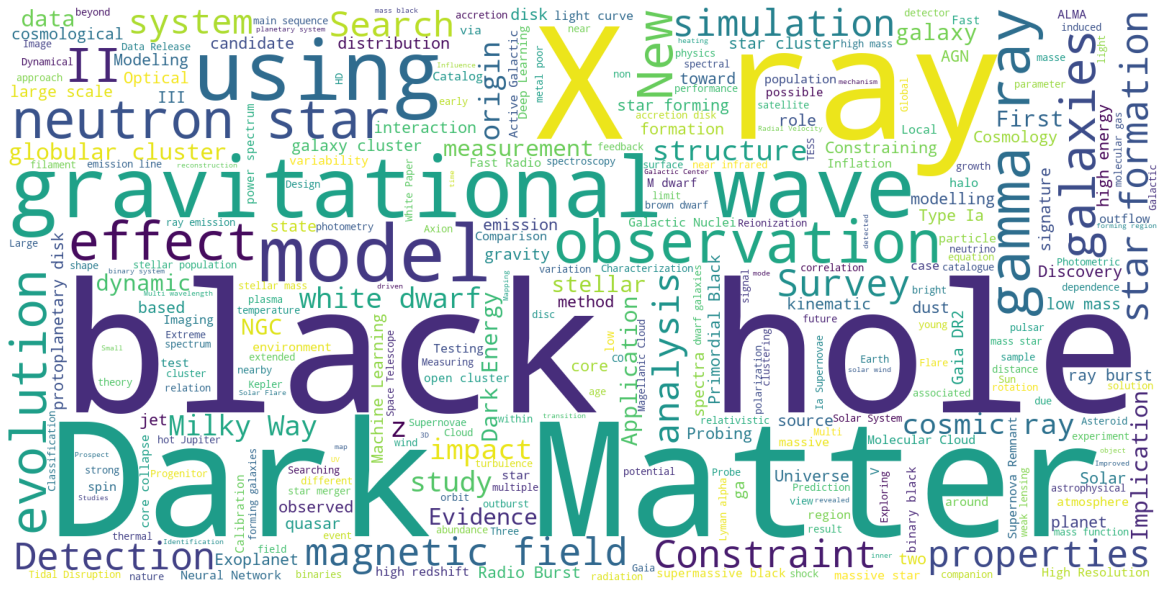

In [40]:
topic_df = train_data[train_data["category"] == "astro-ph"]
corpus = createCorpus(topic_df["title"])

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words = 300,
                min_font_size = 10).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (24, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo.png')
plt.show()